In [1]:
print "Loading libraries, processed dataset and self implemented functions"
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

processed = pd.read_csv("../data/processed/processed.csv")
print processed.head()
def agg_attrs_by_month(attr_dict, return_raw=False):
    df = processed
    for attr in attr_dict:
        df = df[df[attr] == attr_dict[attr]]

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by=['Date']).dropna()
    df = df.set_index('Date')
    df.groupby(pd.Grouper(freq="M"))
    sum = df.groupby(pd.Grouper(freq="M")).sum()
    data = list(sum['Order_Demand'])
    dates = list(sum.index)
    if return_raw is True:
        return sum['Order_Demand'], dates
    return data, dates


Loading libraries, processed dataset and self implemented functions
   Unnamed: 0  Product_Code Warehouse Product_Category       Date  \
0           0  Product_0993    Whse_J     Category_028  2012/7/27   
1           1  Product_0979    Whse_J     Category_028  2012/1/19   
2           2  Product_0979    Whse_J     Category_028   2012/2/3   
3           3  Product_0979    Whse_J     Category_028   2012/2/9   
4           4  Product_0979    Whse_J     Category_028   2012/3/2   

   Order_Demand  
0           100  
1           500  
2           500  
3           500  
4           500  


Trying decomposition...


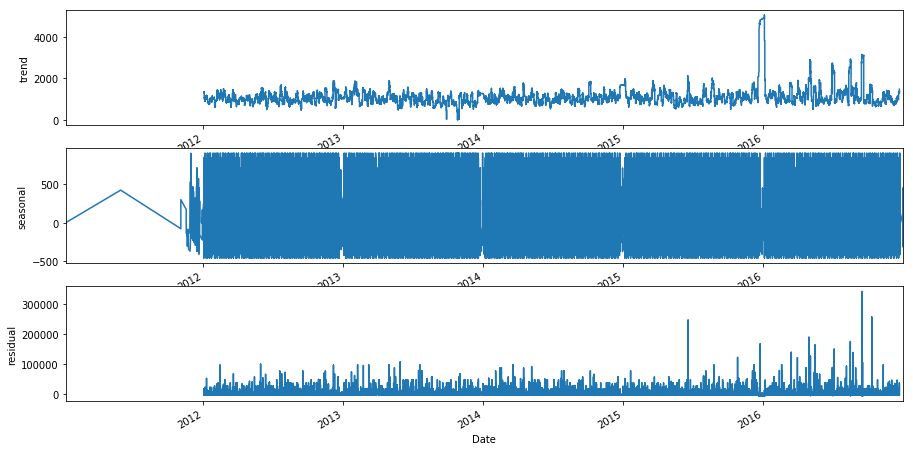

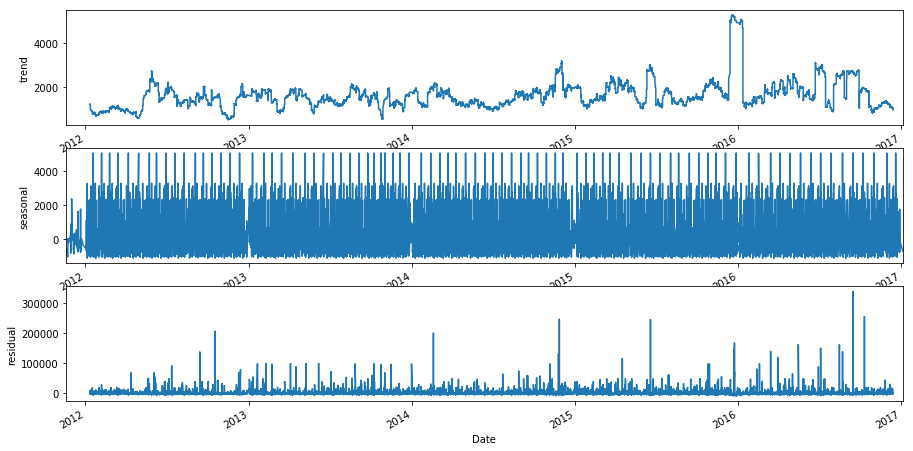

In [2]:
print "Trying decomposition..."
def decompose_attr_value(attr, attr_value, basis='daily'):
    df = processed[processed[attr] == attr_value]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by=['Date']).dropna()
    df = df.set_index('Date')
    data = df['Order_Demand']
    dates = []
    
    if basis == 'monthly':
        data, dates = agg_attrs_by_month({attr: attr_value}, return_raw=True)
        decomposed = sm.tsa.seasonal_decompose(data)
    else:
        decomposed = sm.tsa.seasonal_decompose(data, freq=360)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))
    decomposed.trend.plot(ax=ax1)
    decomposed.seasonal.plot(ax=ax2)
    decomposed.resid.plot(ax=ax3)
    ax1.set_ylabel('trend')
    ax2.set_ylabel('seasonal')
    ax3.set_ylabel('residual')
    # plt.title("decomposition of {}".format(attr_value))
    plt.show()


decompose_attr_value('Warehouse', 'Whse_A')
decompose_attr_value('Product_Category', 'Category_028')


decomposing product Product_0606 on daily basis


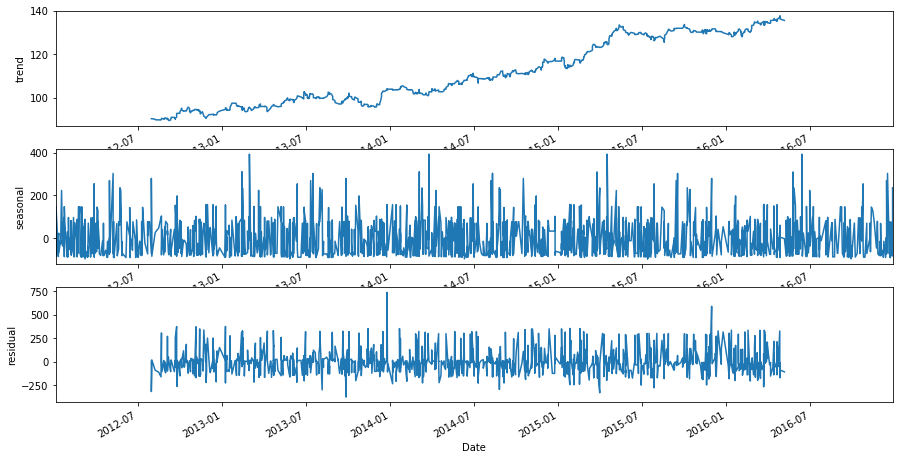

In [3]:
print "decomposing product Product_0606 on daily basis"
decompose_attr_value('Product_Code', 'Product_0606')


decomposing product Product_0606 on monthly basis


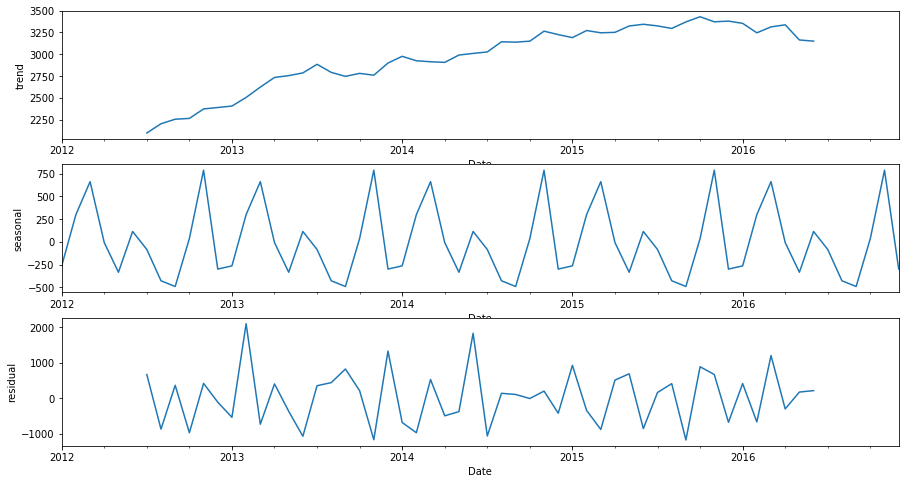

In [4]:
print "decomposing product Product_0606 on monthly basis"
decompose_attr_value('Product_Code', 'Product_0606', basis='monthly')

decomposing product Product_1101 on monthly basis


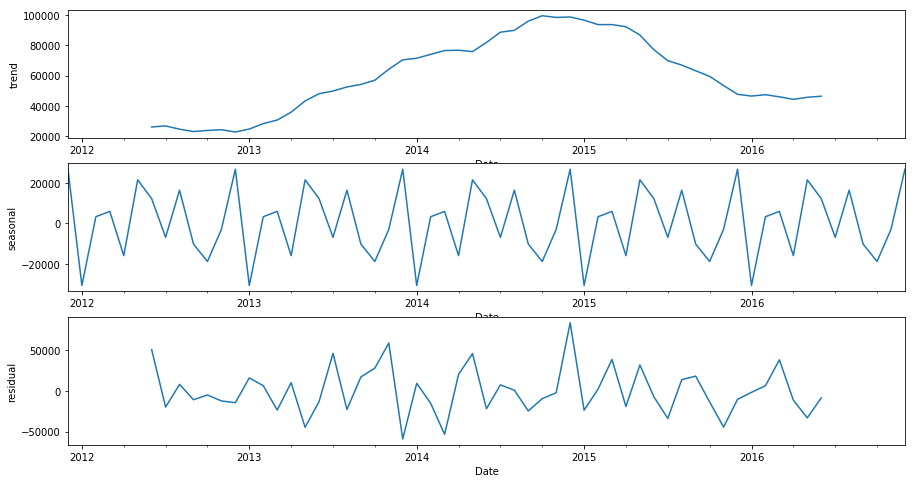

In [5]:
print "decomposing product Product_1101 on monthly basis"
decompose_attr_value('Product_Code', 'Product_1101', basis='monthly')

decomposing product Product_1361 on monthly basis


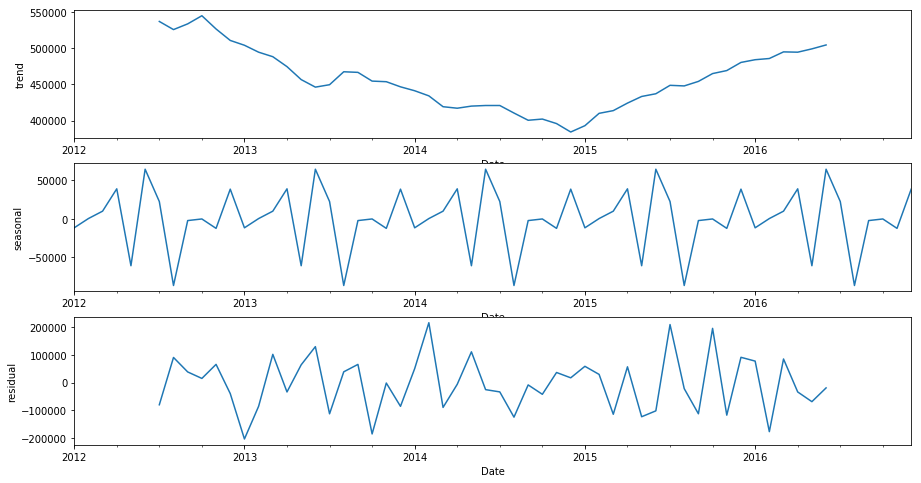

In [6]:
print "decomposing product Product_1361 on monthly basis"
decompose_attr_value('Product_Code', 'Product_1361', basis='monthly')